In [32]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Q1

In [33]:
url= 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df=pd.read_csv(url)
df_name= df.loc[(df.location == 'Israel')]
df_name.head(3)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11663,Israel,ISR,2020-12-19,60.0,60.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
11664,Israel,ISR,2020-12-20,7419.0,7419.0,NaN,7359.0,7359.0,0.09,0.09,NaN,850.0
11665,Israel,ISR,2020-12-21,32303.0,32303.0,NaN,24884.0,16122.0,0.37,0.37,NaN,1863.0


# Q2

In [34]:
df_name.isnull().sum()

location                                0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                16
daily_vaccinations_raw                  1
daily_vaccinations                      1
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred    16
daily_vaccinations_per_million          1
dtype: int64

# Q3

In [35]:
df_name[df_name.loc[:,'daily_vaccinations'].isnull()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11663,Israel,ISR,2020-12-19,60.0,60.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN


# Q4

In [37]:
df_name.fillna(0, inplace = True )
df_name

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11663,Israel,ISR,2020-12-19,60.0,60.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
11664,Israel,ISR,2020-12-20,7419.0,7419.0,0.0,7359.0,7359.0,0.09,0.09,0.00,850.0
11665,Israel,ISR,2020-12-21,32303.0,32303.0,0.0,24884.0,16122.0,0.37,0.37,0.00,1863.0
11666,Israel,ISR,2020-12-22,76915.0,76915.0,0.0,44612.0,25618.0,0.89,0.89,0.00,2960.0
11667,Israel,ISR,2020-12-23,139748.0,139748.0,0.0,62833.0,34922.0,1.61,1.61,0.00,4035.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11835,Israel,ISR,2021-06-09,10613376.0,5471766.0,5141610.0,4568.0,3349.0,122.62,63.22,59.40,387.0
11836,Israel,ISR,2021-06-10,10617667.0,5474941.0,5142726.0,4291.0,3565.0,122.67,63.25,59.42,412.0
11837,Israel,ISR,2021-06-11,10619306.0,5476180.0,5143126.0,1639.0,3590.0,122.69,63.27,59.42,415.0
11838,Israel,ISR,2021-06-12,10619532.0,5476317.0,5143215.0,226.0,3598.0,122.69,63.27,59.42,416.0


# Q5 צרו הסטוגרמה משותפת ל
: people_vaccinated ול total_vaccinations

<AxesSubplot:ylabel='Frequency'>

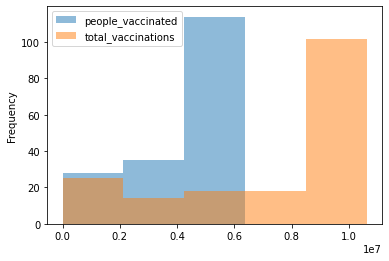

In [56]:
df_name_hist=df_name[['people_vaccinated','total_vaccinations']]
df_name_hist.plot.hist(bins=5,alpha=0.5)

# Q6 
people_fully_vaccinated_per_hundred


Text(0.5, 1.0, 'The green line present the median')

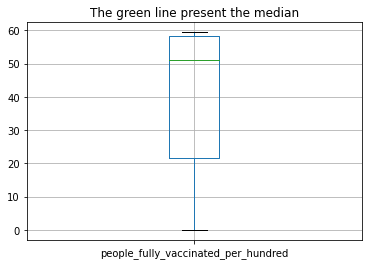

In [58]:
df_name.boxplot('people_fully_vaccinated_per_hundred')
plt.title("The green line present the median")

# Q7

In [70]:
df_name['month'] = pd.DatetimeIndex(df_name.date).month
df_name.head()
df_group=df_name.groupby('month')[['daily_vaccinations','people_vaccinated_per_hundred']].max()
df_group

<ipython-input-70-61374823f4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_name['month'] = pd.DatetimeIndex(df_name.date).month


,daily_vaccinations,people_vaccinated_per_hundred
month,,
1,184946.0,35.84
2,149240.0,54.50
3,98118.0,60.62
4,23894.0,62.39
5,9131.0,62.98
6,3598.0,63.30
12,111001.0,11.44


# Q8

In [72]:
df_group.sort_values('people_vaccinated_per_hundred', ascending = False).head(10)

,daily_vaccinations,people_vaccinated_per_hundred
month,,
6,3598.0,63.30
5,9131.0,62.98
4,23894.0,62.39
3,98118.0,60.62
2,149240.0,54.50
1,184946.0,35.84
12,111001.0,11.44
